# Netflix Data_ Cleaning, Analysis and Visualization

1: Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

2: Load the Dataset

In [2]:
data = pd.read_csv('netflix1.csv')
print(data.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [69]:
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


3: Data Cleaning

In [5]:
missing_summary = data.isnull().sum()
print("Missing values per column:\n", missing_summary)

Missing values per column:
 show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [7]:
initial_shape = data.shape
data = data.drop_duplicates()
print(f"Duplicates removed: {initial_shape[0] - data.shape[0]}")

Duplicates removed: 0


In [11]:
before_dropna = data.shape[0]
data = data.dropna(subset=['director', 'date_added', 'country'])
print(f"Rows with missing 'director', 'date_added', or 'country' removed: {before_dropna - data.shape[0]}")

Rows with missing 'director', 'date_added', or 'country' removed: 0


In [14]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [15]:
print("\nData types after cleaning:\n", data.dtypes)


Data types after cleaning:
 show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


In [16]:
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

4: Exploratory Data Analysis (EDA)

In [21]:
type_counts = data['type'].value_counts()
type_percent = round((type_counts / type_counts.sum()) * 100, 2)


In [22]:
type_df = pd.DataFrame({
    'Type': type_counts.index,
    'Count': type_counts.values,
    'Percentage': type_percent.values
})

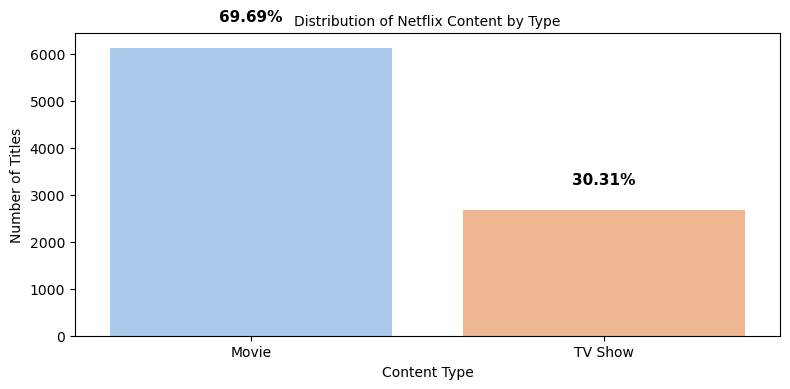

In [29]:
plt.figure(figsize=(8, 4))
sns.barplot(data=type_df, x='Type', y='Count', palette='pastel')
for i, row in type_df.iterrows():
    plt.text(i, row['Count'] + 500, f"{row['Percentage']}%", 
             ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.title('Distribution of Netflix Content by Type', fontsize=10)
plt.xlabel('Content Type', fontsize=10)
plt.ylabel('Number of Titles', fontsize=10)
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='rating'>

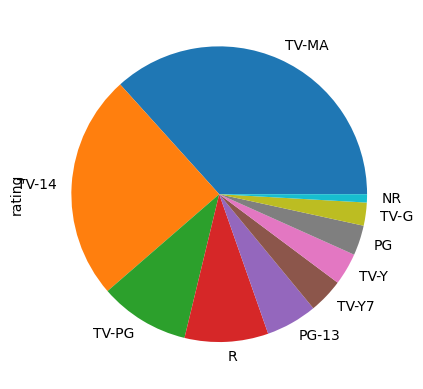

In [31]:
year = data.rating.value_counts()
year[:10].plot(kind = 'pie')

In [32]:
data.rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [33]:
data['genres'] = data['listed_in'].dropna().apply(lambda x: [genre.strip() for genre in x.split(',')])

In [34]:
all_genres = sum(data['genres'], [])

In [35]:
genre_counts = pd.Series(all_genres).value_counts().head(10)

<AxesSubplot:>

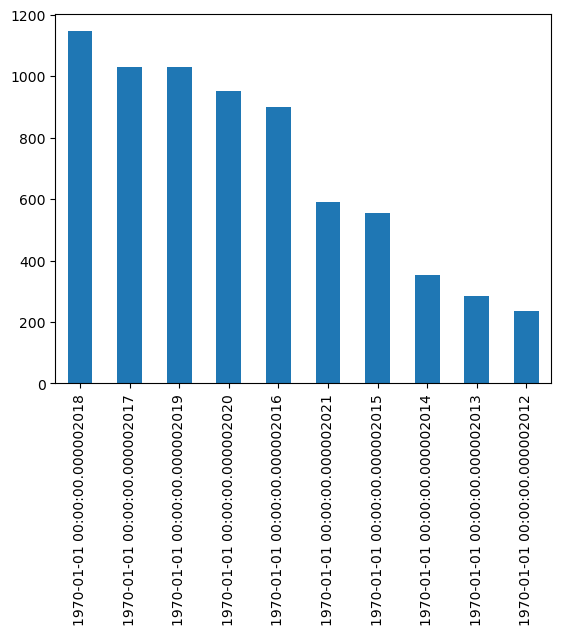

In [54]:
year = data.release_year.value_counts()
year[:10].plot(kind = 'bar')

<AxesSubplot:ylabel='listed_in'>

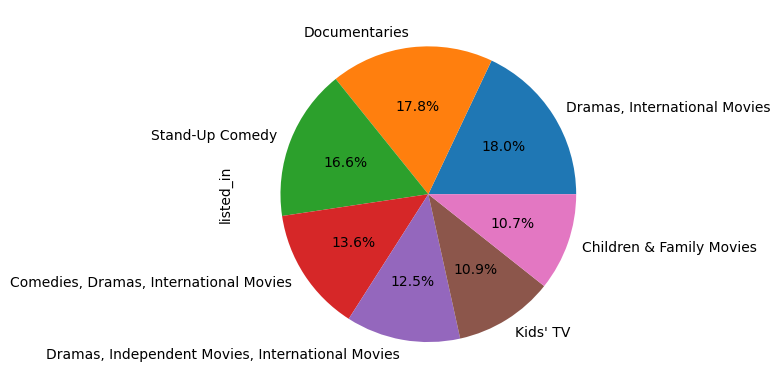

In [42]:
listed_in_list= data.listed_in.value_counts()
listed_in_list[:7].plot(kind = 'pie',autopct ='%1.1f%%')

In [37]:
data['release_year']=pd.to_datetime(data['release_year'])
data['Years']=data['release_year'].dt.year

<AxesSubplot:ylabel='country'>

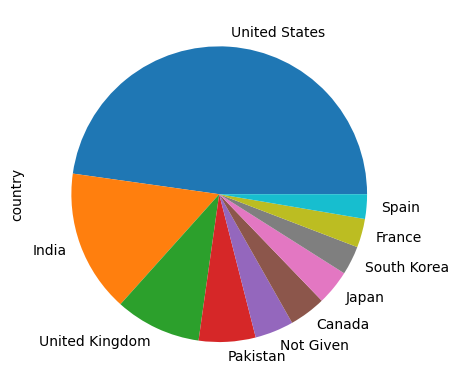

In [48]:
top_10_country = data.country.value_counts()
top_10_country[:10].plot(kind = 'pie')

<AxesSubplot:ylabel='rating'>

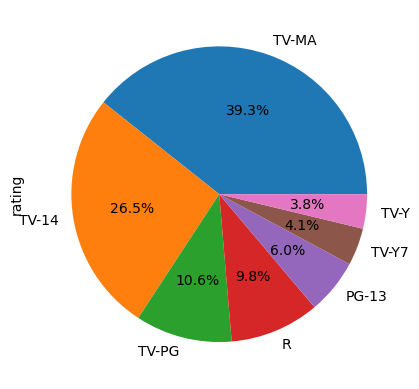

In [49]:
data_rating = data.rating.value_counts()
data_rating[:7].plot(kind = 'pie',autopct ='%1.1f%%')

In [50]:
data.rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

<AxesSubplot:>

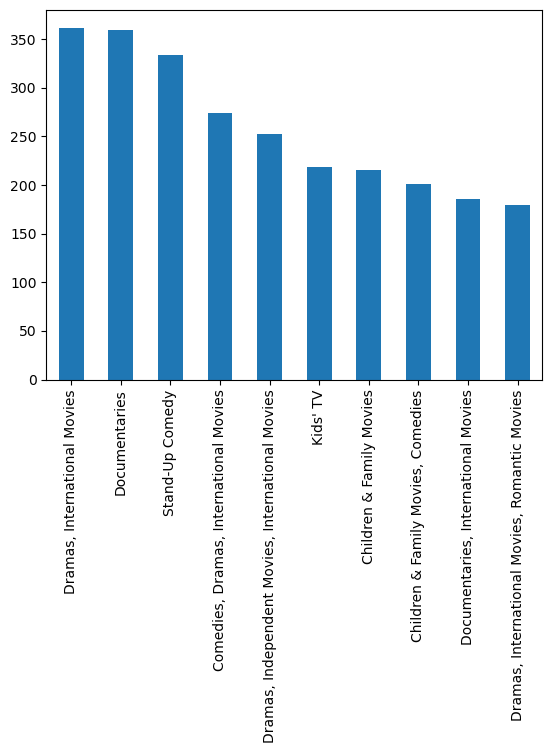

In [51]:
top_10_types = data.listed_in.value_counts()
top_10_types[:10].plot(kind = 'bar')

<AxesSubplot:ylabel='title'>

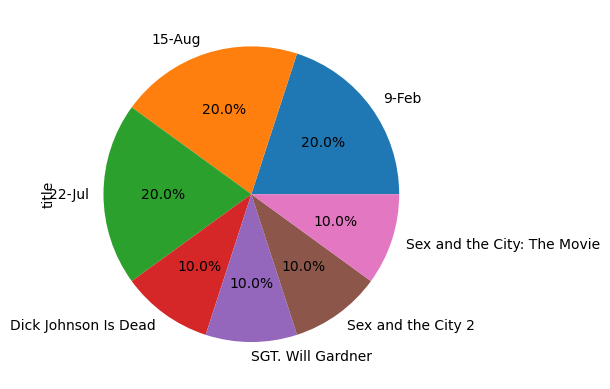

In [53]:
data_title= data.title.value_counts()
data_title[:7].plot(kind = 'pie',autopct ='%1.1f%%')

Text(0, 0.5, 'Genre')

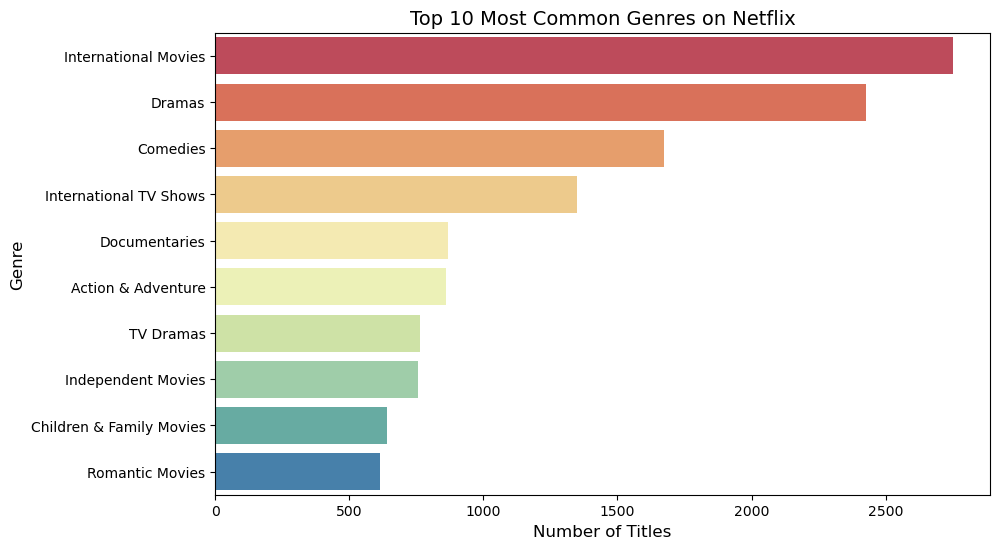

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Spectral')
plt.title('Top 10 Most Common Genres on Netflix', fontsize=14)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genre', fontsize=12)


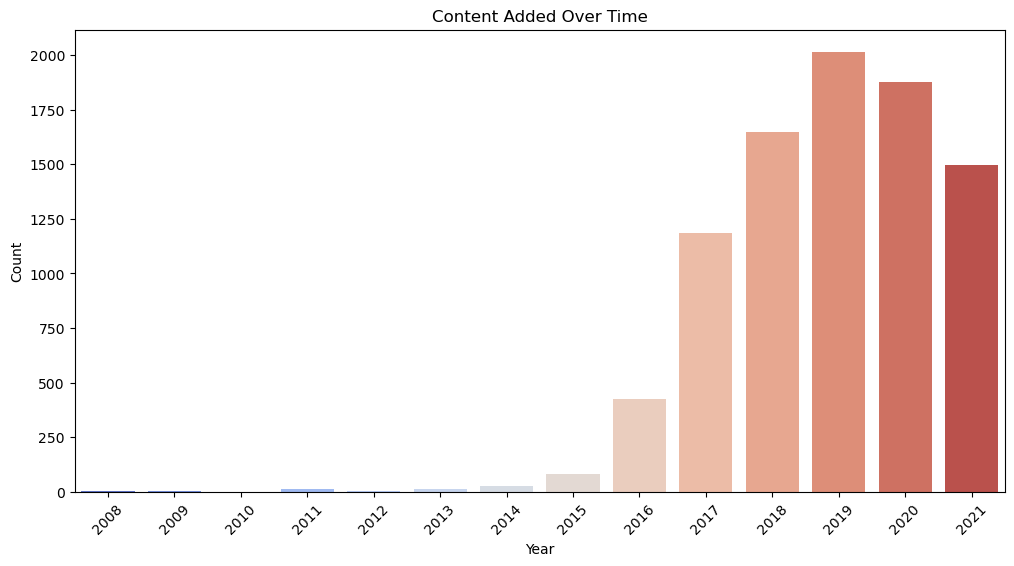

In [56]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [58]:
data['director'] = data['director'].fillna('Unknown').str.strip()

In [59]:
top_directors = data['director'].value_counts().head(10)

In [60]:
director_df = top_directors.reset_index()
director_df.columns = ['Director', 'Count']


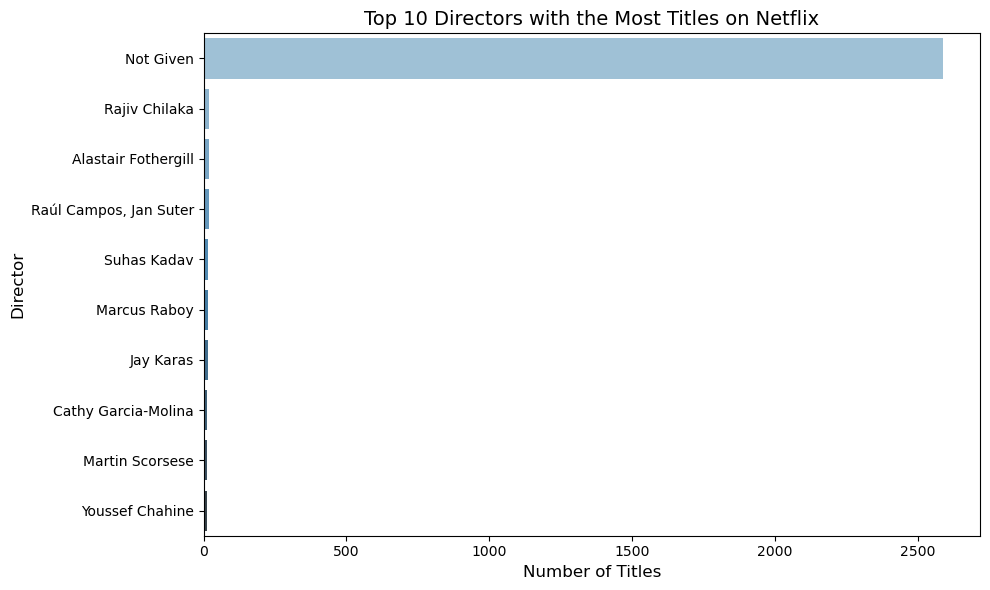

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(data=director_df, x='Count', y='Director', palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles on Netflix', fontsize=14)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.tight_layout()
plt.show()

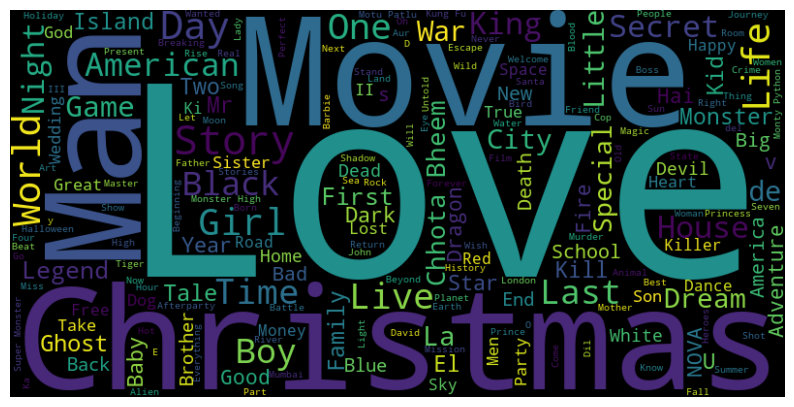

In [67]:
movie_titles = data[data['type'] == 'Movie']['title'].dropna()
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()